
- [x] Read examples from google sheets
- [x] Dataset analysis 
- [x] Create JSON files
- [-] Run zero-shot LERC
- [x] Compute metrics


We do not run the LERC ourselves because we didnt have access to the context.

In [1]:
import pandas as pd 

# https://docs.google.com/spreadsheets/d/1ENuTNVL8xh2YGePoTOuNtLVaelr0L9-xylyzhMLcKOk/edit?usp=sharing

sheet_id = "1ENuTNVL8xh2YGePoTOuNtLVaelr0L9-xylyzhMLcKOk"
sheet1_name = "Correctness"
sheet2_name = "Abstractive_answer_correctness_correlation"

def get_gdrive_url(sid, sname) -> str:
    return f"https://docs.google.com/spreadsheets/d/{sid}/gviz/tq?tqx=out:csv&sheet={sname}"

sheets_url = [get_gdrive_url(sheet_id, sheet_name) for sheet_name in (sheet1_name, sheet2_name)]
sheets = [pd.read_csv(url) for url in sheets_url]
sheets = pd.concat(sheets).reset_index(drop=True)
assert sheets.annotation_id.nunique() == 200
sheets

,annotation_id,annotation_type,question,reference,prediction,LERC,correctness
0,432307ebb792ba356ec02ff3523346e7a24fc60a,extractive,What size ngram models performed best? e.g. bi...,advantage of bigrams on Subtask A was very slight,Unanswerable,1.151097,0.00
1,162cbc100d96539e18f3dd8a445837bfdf6d2c4f,boolean,did they experiment with other languages?,No,Yes,1.005072,0.00
2,0c0c9d2c5fc4c144d6fbc1f0e875219f6407ed06,abstractive,How are the results evaluated?,With a questionnaire asking subjects to rank m...,the results provided by the proposed method we...,1.432871,0.00
3,83d16a90685b94fe9a92a83e74724fe0ba832912,boolean,Do they report results only on English data?,Yes,Unanswerable,1.373799,0.00
4,9971d5fec71a89f984ebabb7e30058b17f2f1a9f,extractive,What language is used for the experiments?,English,Unanswerable,1.211834,0.00
...,...,...,...,...,...,...,...
195,33bfd6cfadf0cffbb193aeab89867b8bc73d94b3,abstractive,What other tasks do they test their method on?,None,task of predicting hashtags from characters in...,0.829131,0.00
196,b250fd2019421911362cc78e7fe0696615ed0284,abstractive,What is the size of the new dataset?,"14,100 tweets","14,100 tweets",5.083067,1.00
197,4fcd5fec657a87a2da9afdd900961d34eedbaac7,abstractive,which algorithm was the highest performer?,A hybrid model consisting of best performing p...,Normalized Discounted Cumulative Gain (nDCG) B...,1.097943,0.00
198,5573af4ed6908677bb3e911b0699fecd657a3e38,abstractive,How do they combine a deep learning model with...,Entities from a deep learning model are linked...,They use a deep learning model to learn inform...,1.392461,0.00


In [2]:
sheets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   annotation_id    200 non-null    object 
 1   annotation_type  200 non-null    object 
 2   question         200 non-null    object 
 3   reference        200 non-null    object 
 4   prediction       200 non-null    object 
 5   LERC             200 non-null    float64
 6   correctness      200 non-null    float64
dtypes: float64(2), object(5)
memory usage: 11.1+ KB


In [3]:
sheets.annotation_type.value_counts()

abstractive    121
extractive      56
boolean         15
none             8
Name: annotation_type, dtype: int64

In [4]:
sheets.correctness.value_counts()

0.00    148
1.00     20
0.50     15
0.25     10
0.75      7
Name: correctness, dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'Annotation Type')

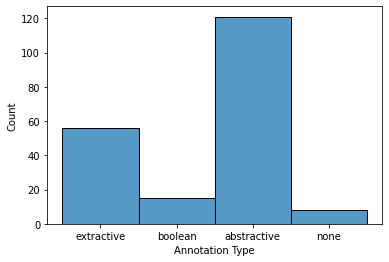

In [6]:
sns.histplot(data=sheets.annotation_type)
plt.xlabel("Annotation Type")

Text(0.5, 0, 'Correctness')

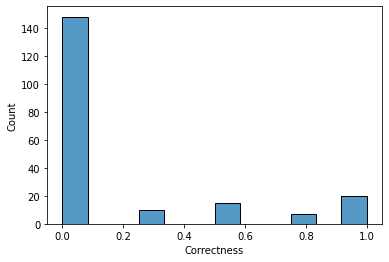

In [7]:
sns.histplot(data=sheets.correctness)
plt.xlabel("Correctness")

Text(0.5, 0, 'LERC')

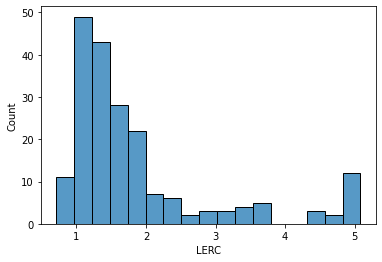

In [8]:
sns.histplot(data=sheets.LERC)
plt.xlabel("LERC")

Text(0.5, 0, 'LERC')

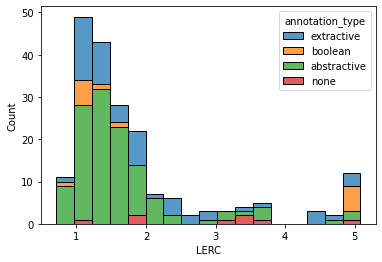

In [9]:
sns.histplot(data=sheets, x="LERC", hue="annotation_type", multiple="stack")
plt.xlabel("LERC")

Text(0.5, 0, 'LERC')

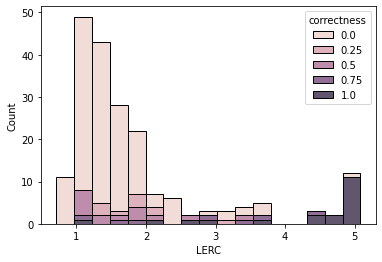

In [10]:
sns.histplot(data=sheets, x="LERC", hue="correctness", multiple="stack")
plt.xlabel("LERC")

Text(0.5, 0, 'Correctness')

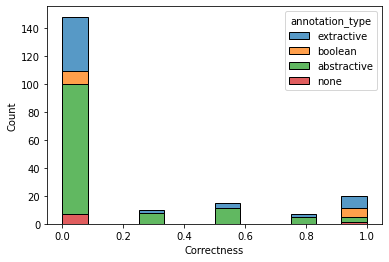

In [11]:
sns.histplot(data=sheets, x="correctness", hue="annotation_type", multiple="stack")
plt.xlabel("Correctness")

In [12]:
(sheets.reference == sheets.prediction).sum()

10

In [13]:
sheets[sheets.reference == sheets.prediction]

,annotation_id,annotation_type,question,reference,prediction,LERC,correctness
9,9a1809d77dde373adc81195da44c85a3f3ddeb9d,boolean,Do they use all the hidden layer representations?,Yes,Yes,5.078454,1.0
37,bfcdb68885bdf1350102f50d764e82372ff83d8a,boolean,Do they analyze attention outputs to determine...,No,No,5.030257,1.0
38,e3122daa6fc9705fbea240ac15e24f5b32d0eb50,boolean,Are constructed datasets open sourced?,Yes,Yes,5.070571,1.0
44,7e6171878d689c3df00fbd39120fae5be22a87e6,boolean,Does the baseline use any contextual information?,No,No,5.078834,1.0
45,1671c932434c4c9adde9155ae0f335d6ede0bee3,extractive,How does counterfactual data augmentation affe...,Unanswerable,Unanswerable,1.990820,0.0
48,0fed44ec716a8a7673f5d3f7d675904d9d773b96,boolean,Is English a pro-drop language?,No,No,5.073115,1.0
59,cdc2fa54e952ba32949ca756aafcc82906f4b6fa,none,what lexical features are extracted?,Unanswerable,Unanswerable,5.060999,1.0
65,b4a7bf87d0696bc1b86b5eb48ee693be5d917cb4,boolean,did they experiment with other text embeddings?,No,No,0.994450,1.0
94,78b2688883324dba910a289ce5eaf872f18c62d8,extractive,How long is their dataset?,670 publications,670 publications,5.056758,1.0
196,b250fd2019421911362cc78e7fe0696615ed0284,abstractive,What is the size of the new dataset?,"14,100 tweets","14,100 tweets",5.083067,1.0


In [14]:
sheets[sheets.prediction.isin(["Yes", "No"])]

,annotation_id,annotation_type,question,reference,prediction,LERC,correctness
1,162cbc100d96539e18f3dd8a445837bfdf6d2c4f,boolean,did they experiment with other languages?,No,Yes,1.005072,0.0
9,9a1809d77dde373adc81195da44c85a3f3ddeb9d,boolean,Do they use all the hidden layer representations?,Yes,Yes,5.078454,1.0
14,d77a4c1443fc803a4daf4b69bcbdeb30d6559652,boolean,Does this work differentiate metaphor(techniqu...,No,Yes,5.049659,0.0
25,5c8b526242c77976c71cc4d65a45b33834dda6f5,none,Did they collect their own corpus?,Unanswerable,No,3.601686,0.0
37,bfcdb68885bdf1350102f50d764e82372ff83d8a,boolean,Do they analyze attention outputs to determine...,No,No,5.030257,1.0
38,e3122daa6fc9705fbea240ac15e24f5b32d0eb50,boolean,Are constructed datasets open sourced?,Yes,Yes,5.070571,1.0
44,7e6171878d689c3df00fbd39120fae5be22a87e6,boolean,Does the baseline use any contextual information?,No,No,5.078834,1.0
48,0fed44ec716a8a7673f5d3f7d675904d9d773b96,boolean,Is English a pro-drop language?,No,No,5.073115,1.0
49,bd6c1da455b10c077979e36651ce696e85eca0c8,boolean,Do they test against the large version of RoBE...,Yes,No,0.997800,0.0
53,87dd9eb0b55a160563bfc7edc5da79d82be44659,boolean,Does the paper list other heuristic biases in ...,Yes,No,1.000522,0.0


Length-analysis

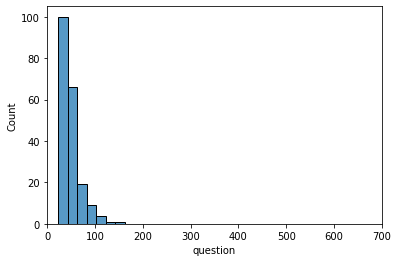

In [15]:
question_len = sheets["question"].apply(len)
sns.histplot(question_len, binwidth=20)
plt.xlim(0, 700)
plt.show()

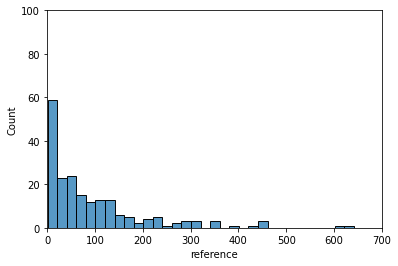

In [16]:
reference_len = sheets["reference"].apply(len)
sns.histplot(reference_len, binwidth=20)
plt.xlim(0, 700)
plt.ylim(0, 100)

plt.show()

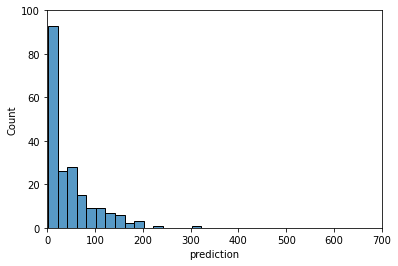

In [17]:
candidate_len = sheets["prediction"].apply(len)
sns.histplot(candidate_len, binwidth=20)
plt.xlim(0, 700)
plt.ylim(0, 100)
plt.show()

<AxesSubplot:xlabel='correctness', ylabel='Count'>

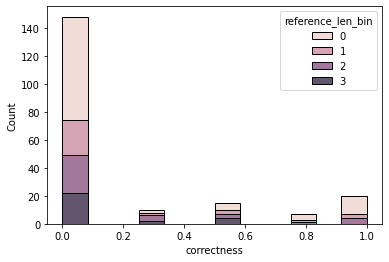

In [18]:
LENGTH_BINS = {
    0: [0, 50], 
    1: [51, 100],
    2: [101, 200],
    3: [201, 700]
}

def get_length_bins(length, groups=LENGTH_BINS):
    for group_name, group_interval in groups.items():
        if group_interval[0] <= length <= group_interval[1]:
            return group_name
        

reference_len_bins = reference_len.apply(get_length_bins)
sheets["reference_len_bin"] = reference_len_bins
sns.histplot(data=sheets, x="correctness", hue="reference_len_bin", multiple="stack")

<AxesSubplot:xlabel='reference_len_bin', ylabel='correctness'>

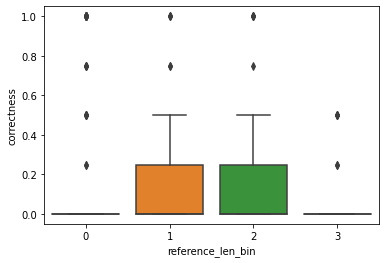

In [19]:
sns.boxplot(data=sheets, y="correctness", x="reference_len_bin")

Observations:
- Annotated examples are extremely left-skewed.
- Only 10 are exact matches, 2 of which are assigned a score of 0.
- Most annotated examples are abstractive.
- References answers' length has a heavier tail than predictions. 

Create dataset for LERC: 

```python
"03bca10ea62bfb7de881f842a35674a5": {
    "candidate": "Chinese nationals",
    "context": "The city of Bangkok has a population of 8,280,925 according to the 2010 census, or 12.6 percent of the national population. In 2018, the population has been estimated to be about 10 million. Roughly half are internal Thai immigrants from other provinces. Only 5,692,284 residents, belonging to 2,672,423 households, registered Bangkok as their legal domicile. A large number of Bangkoks daytime population commutes from surrounding provinces in the Bangkok Metropolitan Region, the total population of which is 14,565,547. Bangkok is a cosmopolitan city; the census showed that it is home to 81,570 Japanese and 55,893 Chinese nationals, as well as 117,071 expatriates from other Asian countries, 48,341 from Europe, 23,418 from the Americas, 5,289 from Australia and 3,022 from Africa. Immigrants from neighbouring countries include 303,595 Burmese, 63,438 Cambodians and 18,126 Lao. In 2018, numbers show that there are 370,000 international migrants registered with the Department of Employment, more than half of them migrants from Cambodia, Laos, and Myanmar.",
    "metadata": {
        "scores": [1, 1],
        "source": "naqanet"
    },
    "question": "Which group had the smallest amount of foreign nationals in Bangkok?",
    "reference": "Africa",
    "score": 1
}       
```

In [20]:
from typing import Dict, Tuple


def to_lerc_format(example) -> Tuple[str, Dict]:
    key = example["annotation_id"]
    
    
    d = {
        "context": "",
        "question": example["question"],
        "candidate": example["prediction"],
        "reference": example["reference"],
        "metadata": {
            "scores": [example["correctness"]],
            "source": "longformer",
        },
        "annotation_type": example["annotation_type"], 
        "score": example["correctness"],
        "score_scaled": example["correctness"],
        "LERC": example["LERC"],
    }
    
    return key, d



In [21]:
qasper_dataset = {}

for i, example in sheets.iterrows():
    key, example = to_lerc_format(example)
    qasper_dataset[key] = example
    
# Write to file
from create_datasets import write_json_dataset

write_json_dataset({"qasper": qasper_dataset}, "../data/lr_experiments", "qasper")

In [22]:
from create_datasets import create_dataset

import os

ROOT_DIR = ".."
ORIGINAL_MOCHA_DIR = f"{ROOT_DIR}/data/lr_experiments"
PREPROC_DIR = f"{ROOT_DIR}/data/lr_experiments"
os.makedirs(PREPROC_DIR, exist_ok=True)

W2VEC_MODEL = 'GoogleNews-vectors-negative300'
W2VEC_PATH = f"{ROOT_DIR}/data/preprocessing/{W2VEC_MODEL}.bin.gz"

default_kwargs = {
    "output_dir": PREPROC_DIR,
    "w2vec_path": W2VEC_PATH,
}

# Create raw metric modeling datasets (w/ different metrics)
create_dataset(ORIGINAL_MOCHA_DIR, "qasper", **default_kwargs)

[nltk_data] Downloading package stopwords to /home/kat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


> Input statistics
> BLEU
Found 0 invalid examples (according to HF_BLEU) in qasper: set()
> ROUGE
> METEOR
> TOKEN-OVERLAP
> EDIT RATES
> Learned Metrics


Using default BLEURT-Base checkpoint for sequence maximum length 128. You can use a bigger model for better results with e.g.: datasets.load_metric('bleurt', 'bleurt-large-512').


INFO:tensorflow:Reading checkpoint /home/kat/.cache/huggingface/metrics/bleurt/default/downloads/extracted/6aeb5b0da7794f61ad09cfb7badbbe4274f037d56edf549b3331c1732281ea88/bleurt-base-128.
INFO:tensorflow:Config file found, reading.
INFO:tensorflow:Will load checkpoint bert_custom
INFO:tensorflow:Loads full paths and checks that files exists.
INFO:tensorflow:... name:bert_custom
INFO:tensorflow:... vocab_file:vocab.txt
INFO:tensorflow:... bert_config_file:bert_config.json
INFO:tensorflow:... do_lower_case:True
INFO:tensorflow:... max_seq_length:128
INFO:tensorflow:Creating BLEURT scorer.
INFO:tensorflow:Creating WordPiece tokenizer.
INFO:tensorflow:WordPiece tokenizer instantiated.
INFO:tensorflow:Creating Eager Mode predictor.
INFO:tensorflow:Loading model.


2022-06-14 15:45:12.205599: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 15:45:12.206089: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-14 15:45:12.206129: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-14 15:45:12.206165: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2022-06-14 15:45:12.206200: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could no

INFO:tensorflow:BLEURT initialized.
